In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics 


In [2]:
df= pd.read_csv("C:\\Users\\Anshul\\Documents\\car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.shape

(301, 9)

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
print(df.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [8]:
print(df.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [9]:
print(df.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


<AxesSubplot:>

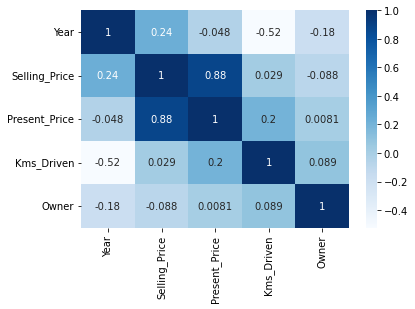

In [10]:
correlation= df.corr()
sns.heatmap(correlation, cbar= True, annot= True, cmap= 'Blues')

In [11]:
# encoding the categoroical data
df.replace( {'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace= True)

In [12]:
df.replace( {'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace= True)
df.replace( {'Transmission':{'Manual':0, 'Automatic':1}}, inplace= True)

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


<AxesSubplot:>

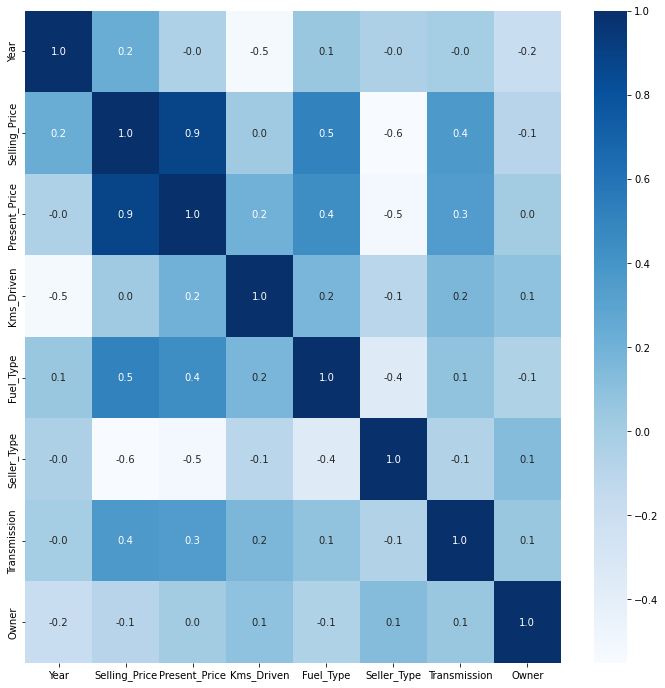

In [14]:
correlation= df.corr()
plt.figure(figsize= (12,12))
sns.heatmap(correlation, cbar= True,fmt='.1f', annot= True, cmap= 'Blues')

In [15]:
x= df.drop(['Car_Name', 'Selling_Price'],axis=1)
y= df['Selling_Price']

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=48,test_size=0.1)

In [17]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# evalutaing the model

In [19]:
train_pred= model.predict(x_train)
error= metrics.mean_absolute_error(y_train, train_pred)

In [20]:
print( 'The mean absolute error is :', error)

The mean absolute error is : 1.1990504846640677


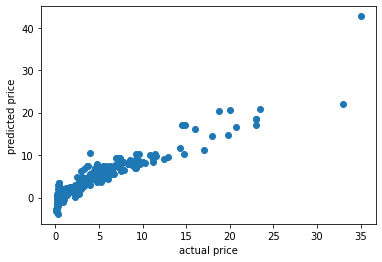

In [22]:
# visualize actual and predicted prize
plt.scatter( y_train, train_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [24]:
test_pred= model.predict(x_test)
error2= metrics.mean_absolute_error(y_test, test_pred)

In [25]:
print( 'The mean absolute error is :', error2)

The mean absolute error is : 1.2703874511579802


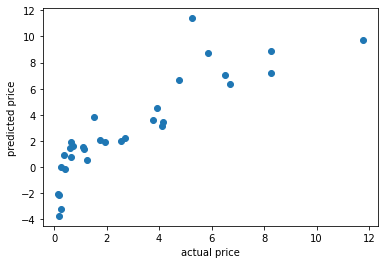

In [26]:
# visualize actual and predicted prize
plt.scatter( y_test, test_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()